In [34]:
import numpy as np
from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import fftconvolve, lfilter, firwin
from scipy.fft import fft, ifft

import matplotlib.pyplot as plt
import IPython.display as ipd


In [12]:
# Several flavors of bandpass FIR filters.

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

def bandpass_kaiser(ntaps, lowcut, highcut, fs, width):
    nyq = 0.5 * fs
    atten = kaiser_atten(ntaps, width / nyq)
    beta = kaiser_beta(atten)
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=('kaiser', beta), scale=False)
    return taps

def bandpass_remez(ntaps, lowcut, highcut, fs, width):
    delta = 0.5 * width
    edges = [0, lowcut - delta, lowcut + delta,
             highcut - delta, highcut + delta, 0.5*fs]
    taps = remez(ntaps, edges, [0, 1, 0], Hz=fs)
    return taps

In [5]:
duration  = 1.0
fs        = 8000
amplitude = 2
npoints   = int(duration * fs)
noise     = (amplitude/3)* np.random.randn(npoints)
time      = np.arange(npoints) / fs

In [29]:
f_low = 500
f_high = 1000
f_width = 500
fir_taps = bandpass_kaiser(ntaps = 100, lowcut = f_low, highcut = f_high, fs = fs, width = f_width)
bandlim_noise = fftconvolve(noise, fir_taps, mode='same')

In [30]:
bandlim_noise.shape

(8000,)

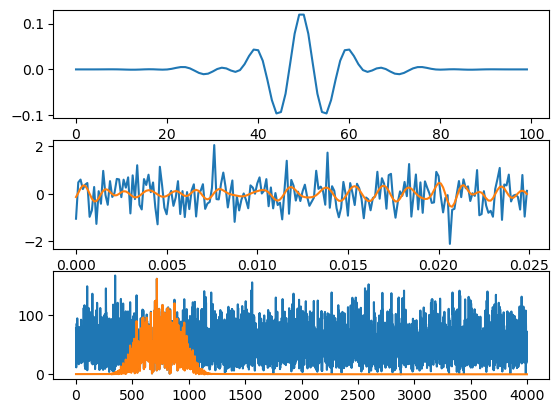

In [37]:
time_show = 200
fig, ax = plt.subplots(3, 1)
ax[0].plot(fir_taps)
ax[1].plot(time[:time_show], noise[:time_show])
ax[1].plot(time[:time_show], bandlim_noise[:time_show])
ax[2].plot(np.abs(fft(noise))[:int(fs/2)])
ax[2].plot(np.abs(fft(bandlim_noise))[:int(fs/2)])

In [27]:
ipd.Audio(noise, rate=fs)

In [32]:
ipd.Audio(bandlim_noise, rate=fs)